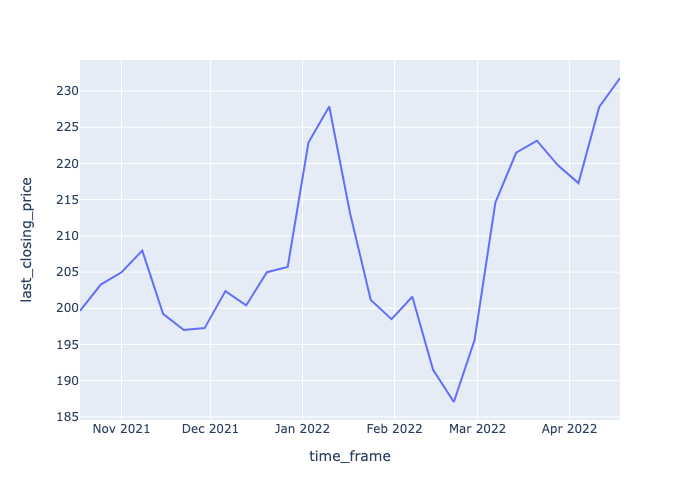

In [5]:
import plotly
import plotly.express as px
import pandas as pd
import psycopg2
import config
import kaleido

conn = psycopg2.connect(
        database=config.DB_NAME,
        host=config.DB_HOST,
        user=config.DB_USER,
        password=config.DB_PASS,
        port=config.DB_PORT,
    )

query = """
    SELECT symbol, time_bucket('7 days', stock_datetime) AS time_frame, last(price_close, stock_datetime) AS last_closing_price from equity_majors
    WHERE symbol = 'CAT'
    GROUP BY time_frame, symbol
    ORDER BY time_frame
    """

df = pd.read_sql(query, conn)

# print(df.head(3))

# create chart
figure = px.line(df, x="time_frame", y="last_closing_price")

# print(plotly)

figure.show(renderer="png")

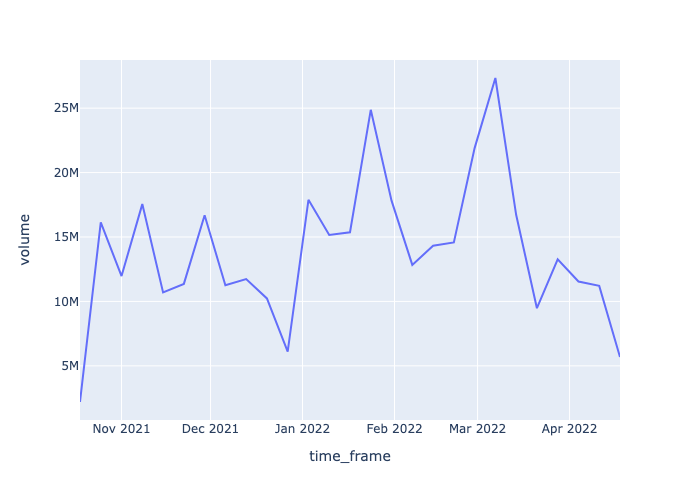

In [6]:
import plotly
import plotly.express as px
import pandas as pd
import psycopg2
import config
import kaleido

conn = psycopg2.connect(
    database=config.DB_NAME,
    host=config.DB_HOST,
    user=config.DB_USER,
    password=config.DB_PASS,
    port=config.DB_PORT,
)

query = """
SELECT symbol, time_bucket('7 days', stock_datetime) AS time_frame, sum(trading_volume) AS volume from equity_majors
WHERE symbol = 'CAT'
GROUP BY time_frame, symbol
ORDER BY time_frame
"""

df = pd.read_sql(query, conn)

# print(df.head(3))

# create line chart
figure = px.line(df, x="time_frame", y="volume")

figure.show(renderer="png")

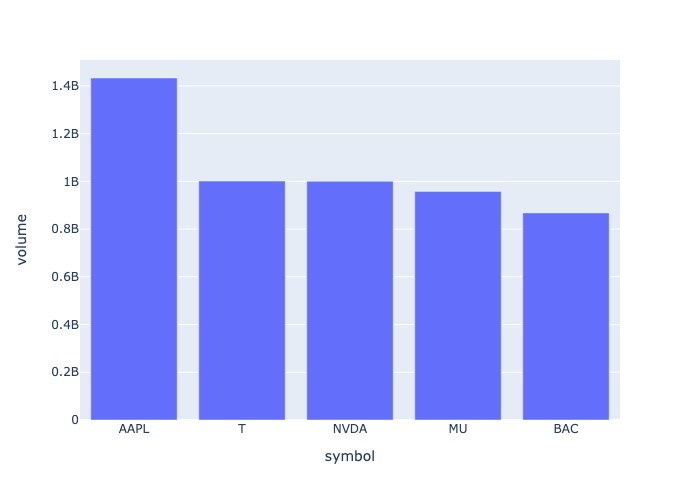

In [10]:
import plotly
import plotly.express as px
import pandas as pd
import psycopg2
import config
import kaleido

conn = psycopg2.connect(
    database=config.DB_NAME,
    host=config.DB_HOST,
    user=config.DB_USER,
    password=config.DB_PASS,
    port=config.DB_PORT,
)

# INTERVAL '14 DAY'
# INTERVAL '6 MONTH
query = """
SELECT symbol, sum(trading_volume) AS volume 
FROM equity_majors
WHERE (now() - date(stock_datetime)) < INTERVAL '1 MONTH'
GROUP BY symbol
ORDER BY volume DESC
LIMIT 5
"""

df = pd.read_sql(query, conn)


# create bar chart
figure = px.bar(df, x="symbol", y="volume")

figure.show(renderer="png")

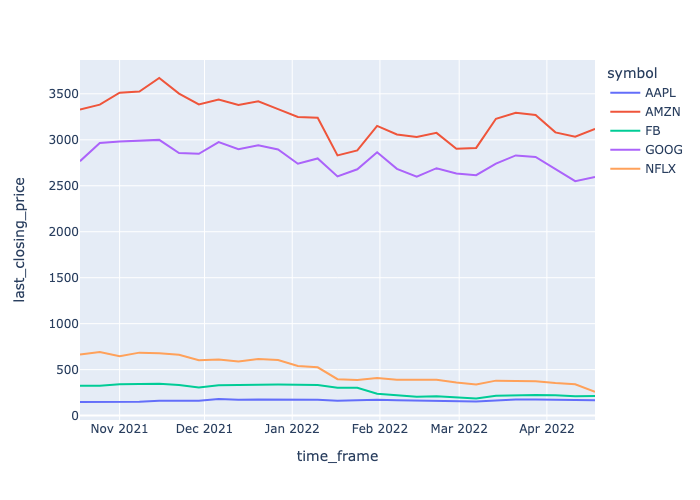

In [14]:

import plotly
import plotly.express as px
import pandas as pd
import psycopg2
import config
import kaleido

conn = psycopg2.connect(
    database=config.DB_NAME,
    host=config.DB_HOST,
    user=config.DB_USER,
    password=config.DB_PASS,
    port=config.DB_PORT,
)

query = """
SELECT symbol, time_bucket('7 days', stock_datetime) AS time_frame, last(price_close, stock_datetime) AS last_closing_price 
FROM equity_majors
WHERE symbol IN ('FB', 'AAPL', 'AMZN', 'GOOG', 'NFLX')
GROUP BY time_frame, symbol
ORDER BY time_frame
"""

df = pd.read_sql(query, conn)

# create line chart
figure = px.line(df, x="time_frame", y="last_closing_price", color="symbol")

figure.show(renderer="png")

In [ ]:

import plotly
import plotly.express as px
import pandas as pd
import psycopg2
import config
import kaleido

conn = psycopg2.connect(
    database=config.DB_NAME,
    host=config.DB_HOST,
    user=config.DB_USER,
    password=config.DB_PASS,
    port=config.DB_PORT,
)

query = """
SELECT *, (closing_price - opening_price)/opening_price * 100 AS percent_change
FROM (
    SELECT symbol, time_bucket('30 days', stock_datetime) AS time_frame, 
    last(price_close, stock_datetime) as closing_price, 
    first(price_close, stock_datetime) as opening_price
    FROM equity_majors
    GROUP BY time_frame, symbol
) AS change
ORDER BY percent_change DESC
"""

df = pd.read_sql(query, conn)

# create bar chart
figure = px.bar(df, x="symbol", y="percent_change", color="symbol")

figure.show(renderer="png")
